<a href="https://colab.research.google.com/github/Swatijoshi2002/scikitlearn_machinelearning/blob/main/miniproject(linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U scikit-learn

In [4]:
import numpy as np #used for making arrays
import pandas as pd #used for making dataframe 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import neighbors,metrics

In [5]:
from google.colab import files
uploaded=files.upload()

Saving Cleaned train.csv to Cleaned train.csv


In [6]:
import io
data=pd.read_csv(io.BytesIO(uploaded["Cleaned train.csv"]))

In [7]:
data.head(20)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
0,1,18.144573,13.833054,7,3.991517,2003,2003,19.433175,144.117862,0.000000,29.991055,422.488510,5.939034,1025.651979,0.0,8.353543,0.99344,0.000000,2,1.068837,3,0.750957,2.261968,0.000000,2003,2,548.0,0.000000,12.080309,0.000000,0.000000,0,1,0,208501
1,2,20.673625,14.117918,6,6.000033,1976,1976,54.598150,181.719186,0.000000,44.135415,593.888179,6.234990,665.141633,0.0,7.974693,0.00000,0.710895,2,0.000000,3,0.750957,1.996577,0.903334,1976,2,460.0,56.184223,0.000000,0.000000,0.000000,0,1,0,181501
2,3,18.668047,14.476512,7,3.991517,2001,2002,17.768840,110.441033,0.000000,56.896536,450.079716,5.994336,1040.521060,0.0,8.408064,0.99344,0.000000,2,1.068837,3,0.750957,1.996577,0.903334,2001,2,608.0,0.000000,9.901081,0.000000,0.000000,0,1,0,223501
3,4,17.249651,14.106196,7,3.991517,1915,1970,54.598150,61.795315,0.000000,64.808858,378.854568,6.027704,904.477422,0.0,8.358662,0.99344,0.000000,1,0.000000,3,0.750957,2.137369,0.903334,1998,3,642.0,0.000000,8.966115,16.020711,0.000000,0,0,0,140001
4,5,21.314283,15.022008,8,3.991517,2000,2000,25.404164,136.624601,0.000000,61.166379,545.309927,6.161221,1273.024863,0.0,8.669321,0.99344,0.000000,2,1.068837,4,0.750957,2.373753,0.903334,2000,3,836.0,42.245702,14.271568,0.000000,0.000000,0,1,0,250001
5,6,21.472480,14.998257,5,3.991517,1993,1995,54.598150,147.876483,0.000000,17.718038,396.388977,5.883144,671.029690,0.0,8.069454,0.99344,0.000000,1,1.068837,1,0.750957,1.834659,0.000000,1993,2,480.0,14.912199,8.235430,0.000000,7.114653,0,1,0,143001
6,7,19.854050,14.228589,8,3.991517,2004,2005,18.962284,230.755721,0.000000,47.147312,765.641349,6.456544,665.141633,0.0,8.341766,0.99344,0.000000,2,0.000000,3,0.750957,2.137369,0.903334,2004,2,636.0,50.794696,11.655819,0.000000,0.000000,0,1,0,307001
7,8,20.673625,14.294344,7,4.679501,1973,1973,21.355330,165.705771,4.749196,37.422804,529.402579,6.135567,1185.824256,0.0,8.605751,0.99344,0.000000,2,1.068837,3,0.750957,2.137369,1.688254,1973,2,484.0,48.174861,22.329537,14.958218,0.000000,0,1,0,200001
8,9,15.558091,13.126988,7,3.991517,1931,1950,54.598150,665.141633,0.000000,90.703489,463.785395,6.074709,899.541673,0.0,8.399606,0.00000,0.000000,2,0.000000,2,1.248543,2.261968,1.688254,1931,2,468.0,25.693552,0.000000,14.347076,0.000000,0,0,0,129901
9,10,15.362900,13.546135,5,4.679501,1939,1950,54.598150,164.606644,0.000000,28.754169,480.412438,6.114659,665.141633,0.0,7.778429,0.99344,0.000000,1,0.000000,2,1.248543,1.834659,1.688254,1939,1,205.0,0.000000,2.367077,0.000000,0.000000,0,1,0,118001


In [8]:
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.head(20)

,index,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
0,0,1,18.144573,13.833054,7,3.991517,2003,2003,19.433175,144.117862,0.000000,29.991055,422.488510,5.939034,1025.651979,0.0,8.353543,0.99344,0.000000,2,1.068837,3,0.750957,2.261968,0.000000,2003,2,548.0,0.000000,12.080309,0.000000,0.000000,0,1,0,208501
1,1,2,20.673625,14.117918,6,6.000033,1976,1976,54.598150,181.719186,0.000000,44.135415,593.888179,6.234990,665.141633,0.0,7.974693,0.00000,0.710895,2,0.000000,3,0.750957,1.996577,0.903334,1976,2,460.0,56.184223,0.000000,0.000000,0.000000,0,1,0,181501
2,2,3,18.668047,14.476512,7,3.991517,2001,2002,17.768840,110.441033,0.000000,56.896536,450.079716,5.994336,1040.521060,0.0,8.408064,0.99344,0.000000,2,1.068837,3,0.750957,1.996577,0.903334,2001,2,608.0,0.000000,9.901081,0.000000,0.000000,0,1,0,223501
3,3,4,17.249651,14.106196,7,3.991517,1915,1970,54.598150,61.795315,0.000000,64.808858,378.854568,6.027704,904.477422,0.0,8.358662,0.99344,0.000000,1,0.000000,3,0.750957,2.137369,0.903334,1998,3,642.0,0.000000,8.966115,16.020711,0.000000,0,0,0,140001
4,4,5,21.314283,15.022008,8,3.991517,2000,2000,25.404164,136.624601,0.000000,61.166379,545.309927,6.161221,1273.024863,0.0,8.669321,0.99344,0.000000,2,1.068837,4,0.750957,2.373753,0.903334,2000,3,836.0,42.245702,14.271568,0.000000,0.000000,0,1,0,250001
5,5,6,21.472480,14.998257,5,3.991517,1993,1995,54.598150,147.876483,0.000000,17.718038,396.388977,5.883144,671.029690,0.0,8.069454,0.99344,0.000000,1,1.068837,1,0.750957,1.834659,0.000000,1993,2,480.0,14.912199,8.235430,0.000000,7.114653,0,1,0,143001
6,6,7,19.854050,14.228589,8,3.991517,2004,2005,18.962284,230.755721,0.000000,47.147312,765.641349,6.456544,665.141633,0.0,8.341766,0.99344,0.000000,2,0.000000,3,0.750957,2.137369,0.903334,2004,2,636.0,50.794696,11.655819,0.000000,0.000000,0,1,0,307001
7,7,8,20.673625,14.294344,7,4.679501,1973,1973,21.355330,165.705771,4.749196,37.422804,529.402579,6.135567,1185.824256,0.0,8.605751,0.99344,0.000000,2,1.068837,3,0.750957,2.137369,1.688254,1973,2,484.0,48.174861,22.329537,14.958218,0.000000,0,1,0,200001
8,8,9,15.558091,13.126988,7,3.991517,1931,1950,54.598150,665.141633,0.000000,90.703489,463.785395,6.074709,899.541673,0.0,8.399606,0.00000,0.000000,2,0.000000,2,1.248543,2.261968,1.688254,1931,2,468.0,25.693552,0.000000,14.347076,0.000000,0,0,0,129901
9,9,10,15.362900,13.546135,5,4.679501,1939,1950,54.598150,164.606644,0.000000,28.754169,480.412438,6.114659,665.141633,0.0,7.778429,0.99344,0.000000,1,0.000000,2,1.248543,1.834659,1.688254,1939,1,205.0,0.000000,2.367077,0.000000,0.000000,0,1,0,118001


In [9]:
New={'TotalBsmtSF':data['TotalBsmtSF'],'Bed':data['BedroomAbvGr'],'Price':data['Saleprice']}
df=pd.DataFrame(New)
print(df)
Y=df['Price']
X=df.drop(['Price'],axis=1)

      TotalBsmtSF  Bed   Price
0      422.488510    3  208501
1      593.888179    3  181501
2      450.079716    3  223501
3      378.854568    3  140001
4      545.309927    4  250001
...           ...  ...     ...
1453   464.212769    3  175001
1454   707.987030    3  210001
1455   548.233041    4  266501
1456   517.217311    2  142126
1457   591.410990    3  147501

[1458 rows x 3 columns]


In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2) #training datais 80%  and test data=20%
print(X.shape,X_train.shape,X_test.shape)


(1458, 2) (1166, 2) (292, 2)


In [11]:
model=linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [13]:
prediction=model.predict(X_train)
print(prediction)
#r square error
error1=metrics.r2_score(Y_train,prediction)
print("r2 error==>",error1) #gives the error made by our model
e=metrics.mean_absolute_error(Y_train,prediction)
print(e)

[292130.33358989 237837.86525964 180592.29059766 ... 209782.74164436
  92531.70927286 191677.21768484]
r2 error==> 0.4574154064693726
44386.25209949176


Text(0.5, 1.0, 'actual and predicted price graph')

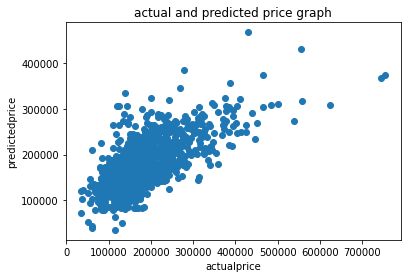

In [14]:
plt.scatter(Y_train,prediction)
plt.xlabel('actualprice')
plt.ylabel('predictedprice')
plt.title('actual and predicted price graph')

In [15]:
prediction_t=model.predict(X_test)
print(prediction_t)
errort=metrics.r2_score(Y_test,prediction_t)
print("r2 error==>",errort) #gives the error made by our model

[135131.4408172  230019.13856675 140801.89663007 159882.8741622
 129235.89127879 222332.15085844 213978.14105473 171125.07123367
 212800.52883414 298342.45811826 221049.72536188 157903.14619604
 232308.13432538 271543.39146873 136001.11164259 180730.93981248
 184606.58693761 184576.92616381 150308.71238368 153193.83109315
 236507.26871803 177089.72491848 208698.00865337 174614.7630292
 228767.38817048 232775.59688246 181858.83359402 180592.29059766
 239433.11082391 138950.67543589 172158.09829114 150289.04532393
 190534.5217669  208019.61804243 176386.61026498 183727.02202603
 151228.42236797 158752.06748151 172661.86631593 172752.05656442
 212085.04534732 171646.13280914 152367.71730263 211002.0548722
 144220.6179727  104524.4247981  213755.25094037  38677.05152601
 205823.63640109 176842.56004351 195619.70769046 163690.31691072
 147659.47064496 155351.18061414 243089.47705136 134115.71332064
 317953.34063799 141655.13298938 124877.19596247 214518.57483169
 241292.22184076 145511.6676

Text(0.5, 1.0, 'actual and predicted price graph')

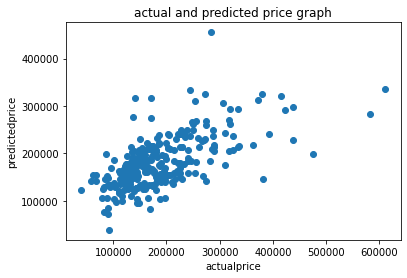

In [16]:
plt.scatter(Y_test,prediction_t)
plt.xlabel('actualprice')
plt.ylabel('predictedprice')
plt.title('actual and predicted price graph')

In [ ]:
error=np.square(np.log10(prediction+1)-np.log10(Y_train+1)).mean()**0.5
acc=1-error
print(acc)

erro=np.square(np.log10(prediction_t+1)-np.log10(Y_test+1)).mean()**0.5
accu=1-error
print(acc)  

0.9242354020381524
0.9242354020381524


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [17]:
num=input()
num=int(num)
print("precidiction on random data",model.predict(X)[num])
print("accuracy on random data",Y[num])

300
precidiction on random data 183620.19637983505
accuracy on random data 157001
